### After cleaning the 3 datasets in different tab (cost_of_living_df, ds_salaries_df, levels_salary_DS) I load those cleaned version of the datasets into this segment, including country codes. I will now start doing the analysing the datas but first I will merge 3 of these datasets

In [224]:
import pandas as pd

In [225]:
cost_of_living_df = pd.read_csv("/Users/ertuboston/Documents/Data_Science_Merrimack/DSE5002/PROJECT_2/DATA/clean_cost_of_living_df.csv")

ds_salaries_df = pd.read_csv("/Users/ertuboston/Documents/Data_Science_Merrimack/DSE5002/PROJECT_2/DATA/clean_ds_salaries_df.csv")

levels_salary_DS = pd.read_csv("/Users/ertuboston/Documents/Data_Science_Merrimack/DSE5002/PROJECT_2/DATA/clean_levels_salary_DS.csv")

country_codes_df = pd.read_csv("/Users/ertuboston/Documents/Data_Science_Merrimack/DSE5002/PROJECT_2/DATA/country_codes - Sheet1.csv")


In [226]:
cost_of_living_df.head(5)

,City,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Hamilton,Bermuda,149.02,96.10,124.22,157.89,155.22,79.43
1,Zurich,Switzerland,131.24,69.26,102.19,136.14,132.52,129.79
2,Basel,Switzerland,130.93,49.38,92.70,137.07,130.95,111.53
3,Zug,Switzerland,128.13,72.12,101.87,132.61,130.93,143.40
4,Lugano,Switzerland,123.99,44.99,86.96,129.17,119.80,111.96


In [227]:
ds_salaries_df.head(5)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,company_location
0,2020,MI,FT,Data Scientist,79833,DE,DE
1,2020,SE,FT,Lead Data Scientist,190000,US,US
2,2020,MI,FT,Data Scientist,35735,HU,HU
3,2020,EN,FT,Data Scientist,51321,FR,FR
4,2020,MI,FT,Data Scientist,40481,IN,IN


In [228]:
levels_salary_DS.head(5)

,company,title,totalyearlycompensation,basesalary,stockgrantvalue,bonus,cityid,dmaid,city,state,country
0,Google,Data Scientist,170000,170000.0,0.0,0.0,7419,807.0,San Francisco,CA,US
1,Facebook,Data Scientist,205000,150000.0,40000.0,15000.0,7300,807.0,Menlo Park,CA,US
2,Microsoft,Data Scientist,220000,150000.0,60000.0,10000.0,11470,819.0,Bellevue,WA,US
3,PayPal,Data Scientist,216000,160000.0,40000.0,16000.0,7422,807.0,San Jose,CA,US
4,Amazon,Data Scientist,185000,185000.0,5000.0,0.0,8821,506.0,Cambridge,MA,US


In [229]:
country_codes_df.head(5)

,Country,Alpha-2 code,Alpha-3 code,Numeric
0,Afghanistan,AF,AFG,4
1,Albania,AL,ALB,8
2,Algeria,DZ,DZA,12
3,American Samoa,AS,ASM,16
4,Andorra,AD,AND,20


In [230]:
### I will merge two datasets first, country_codes_df and cost_of_living_df. 
### I assume I would need this merging to be able to merge one of the other 
### datasets to calculate the spending.

merged_data = pd.merge( cost_of_living_df, country_codes_df, on = 'Country', how = 'left')
merged_data.head(5)

,City,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Alpha-2 code,Alpha-3 code,Numeric
0,Hamilton,Bermuda,149.02,96.10,124.22,157.89,155.22,79.43,BM,BMU,60.0
1,Zurich,Switzerland,131.24,69.26,102.19,136.14,132.52,129.79,CH,CHE,756.0
2,Basel,Switzerland,130.93,49.38,92.70,137.07,130.95,111.53,CH,CHE,756.0
3,Zug,Switzerland,128.13,72.12,101.87,132.61,130.93,143.40,CH,CHE,756.0
4,Lugano,Switzerland,123.99,44.99,86.96,129.17,119.80,111.96,CH,CHE,756.0


In [231]:
### Now we can merge the merged data with levels_salary_DS to keep salaries and cost indexes in the same data.

merged_salary_and_cost = pd.merge(merged_data, levels_salary_DS, left_on='Alpha-2 code', 
                                  right_on='country', how = 'left')
merged_salary_and_cost.head(5)

,City,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Alpha-2 code,Alpha-3 code,...,title,totalyearlycompensation,basesalary,stockgrantvalue,bonus,cityid,dmaid,city,state,country
0,Hamilton,Bermuda,149.02,96.10,124.22,157.89,155.22,79.43,BM,BMU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Zurich,Switzerland,131.24,69.26,102.19,136.14,132.52,129.79,CH,CHE,...,Data Scientist,345000.0,195000.0,120000.0,30000.0,6736.0,0.0,Zurich,ZH,CH
2,Zurich,Switzerland,131.24,69.26,102.19,136.14,132.52,129.79,CH,CHE,...,Data Scientist,94000.0,94000.0,0.0,0.0,13139.0,0.0,Basel,BS,CH
3,Basel,Switzerland,130.93,49.38,92.70,137.07,130.95,111.53,CH,CHE,...,Data Scientist,345000.0,195000.0,120000.0,30000.0,6736.0,0.0,Zurich,ZH,CH
4,Basel,Switzerland,130.93,49.38,92.70,137.07,130.95,111.53,CH,CHE,...,Data Scientist,94000.0,94000.0,0.0,0.0,13139.0,0.0,Basel,BS,CH


In [232]:
print(merged_salary_and_cost.columns)

Index(['City', 'Country', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index',
       'Alpha-2 code', 'Alpha-3 code', 'Numeric', 'company', 'title',
       'totalyearlycompensation', 'basesalary', 'stockgrantvalue', 'bonus',
       'cityid', 'dmaid', 'city', 'state', 'country'],
      dtype='object')


In [233]:
### There are some columns that we won't need it for our research, 
### I will drop those columns first to keep the data more readable.

merged_salary_and_cost.drop(columns = ['Alpha-3 code', 'Numeric', 'cityid', 'dmaid','city', 
                                       'state','country'], inplace=True)
merged_salary_and_cost

,City,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Alpha-2 code,company,title,totalyearlycompensation,basesalary,stockgrantvalue,bonus
0,Hamilton,Bermuda,149.02,96.10,124.22,157.89,155.22,79.43,BM,NaN,NaN,NaN,NaN,NaN,NaN
1,Zurich,Switzerland,131.24,69.26,102.19,136.14,132.52,129.79,CH,Google,Data Scientist,345000.0,195000.0,120000.0,30000.0
2,Zurich,Switzerland,131.24,69.26,102.19,136.14,132.52,129.79,CH,Roche,Data Scientist,94000.0,94000.0,0.0,0.0
3,Basel,Switzerland,130.93,49.38,92.70,137.07,130.95,111.53,CH,Google,Data Scientist,345000.0,195000.0,120000.0,30000.0
4,Basel,Switzerland,130.93,49.38,92.70,137.07,130.95,111.53,CH,Roche,Data Scientist,94000.0,94000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5574,Kanpur,India,20.79,3.60,12.73,22.19,13.31,38.83,IN,Accenture,Data Scientist,20000.0,17000.0,0.0,3000.0
5575,Karachi,Pakistan,20.75,4.84,13.29,18.48,15.21,29.16,PK,NaN,NaN,NaN,NaN,NaN,NaN
5576,Rawalpindi,Pakistan,20.52,4.78,13.14,18.51,16.18,22.91,PK,NaN,NaN,NaN,NaN,NaN,NaN
5577,Multan,Pakistan,18.68,2.94,11.30,18.37,11.80,25.09,PK,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
### Lets see the missing values

In [235]:
merged_salary_and_cost.isna().sum()

City                                 0
Country                              0
Cost of Living Index                 0
Rent Index                           0
Cost of Living Plus Rent Index       0
Groceries Index                      0
Restaurant Price Index               0
Local Purchasing Power Index         0
Alpha-2 code                      2090
company                            231
title                              231
totalyearlycompensation            231
basesalary                         231
stockgrantvalue                    231
bonus                              231
dtype: int64

In [236]:
### I would like to see it as percentage. 

missing_values_perc = merged_salary_and_cost.isna().sum()/ len(merged_salary_and_cost) * 100
missing_values_perc

City                               0.000000
Country                            0.000000
Cost of Living Index               0.000000
Rent Index                         0.000000
Cost of Living Plus Rent Index     0.000000
Groceries Index                    0.000000
Restaurant Price Index             0.000000
Local Purchasing Power Index       0.000000
Alpha-2 code                      37.461911
company                            4.140527
title                              4.140527
totalyearlycompensation            4.140527
basesalary                         4.140527
stockgrantvalue                    4.140527
bonus                              4.140527
dtype: float64

In [237]:
merged_salary_and_cost['Alpha-2 code'].unique()

array(['BM', 'CH', 'LB', 'NO', nan, 'IS', 'JE', 'IL', 'DK', 'JP', 'FR',
       'SG', 'AU', 'LU', 'FI', 'HK', 'NZ', 'IE', 'SE', 'DE', 'AT', 'CA',
       'BE', 'IT', 'MT', 'PR', 'MO', 'CY', 'ES', 'QA', 'GR', 'MV', 'SI',
       'CU', 'EE', 'PA', 'BH', 'CN', 'SA', 'JO', 'UY', 'PT', 'HR', 'JM',
       'LV', 'OM', 'SN', 'ET', 'TH', 'KH', 'SK', 'SR', 'KW', 'CR', 'LT',
       'HU', 'ZW', 'CL', 'SV', 'ZA', 'GT', 'PL', 'ID', 'BW', 'BG', 'EC',
       'RO', 'RS', 'MY', 'MA', 'ME', 'FJ', 'MX', 'GH', 'AL', 'IQ', 'BR',
       'NG', 'UG', 'KE', 'AR', 'BD', 'MN', 'PE', 'UA', 'IN', 'AM', 'LK',
       'ZM', 'BY', 'EG', 'RW', 'AZ', 'TR', 'GE', 'PY', 'KZ', 'TN', 'NP',
       'DZ', 'UZ', 'CO', 'KG', 'PK', 'AF'], dtype=object)

In [238]:
### As we see that there nan values in Alpha-2 code column. 
### I will drop those columns since it is only the %38 of the entire data.
### We will be working on the rest of the data which will be enough for calculations 

merged_salary_and_cost.dropna(inplace=True)

In [239]:
merged_salary_and_cost.isna().sum()

City                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
Alpha-2 code                      0
company                           0
title                             0
totalyearlycompensation           0
basesalary                        0
stockgrantvalue                   0
bonus                             0
dtype: int64

In [240]:
merged_salary_and_cost

### Now we have no NA values. 

,City,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Alpha-2 code,company,title,totalyearlycompensation,basesalary,stockgrantvalue,bonus
1,Zurich,Switzerland,131.24,69.26,102.19,136.14,132.52,129.79,CH,Google,Data Scientist,345000.0,195000.0,120000.0,30000.0
2,Zurich,Switzerland,131.24,69.26,102.19,136.14,132.52,129.79,CH,Roche,Data Scientist,94000.0,94000.0,0.0,0.0
3,Basel,Switzerland,130.93,49.38,92.70,137.07,130.95,111.53,CH,Google,Data Scientist,345000.0,195000.0,120000.0,30000.0
4,Basel,Switzerland,130.93,49.38,92.70,137.07,130.95,111.53,CH,Roche,Data Scientist,94000.0,94000.0,0.0,0.0
5,Zug,Switzerland,128.13,72.12,101.87,132.61,130.93,143.40,CH,Google,Data Scientist,345000.0,195000.0,120000.0,30000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5570,Kanpur,India,20.79,3.60,12.73,22.19,13.31,38.83,IN,Dream11,Data Scientist,280000.0,190000.0,75000.0,15000.0
5571,Kanpur,India,20.79,3.60,12.73,22.19,13.31,38.83,IN,Amazon,Data Scientist,133000.0,100000.0,13000.0,20000.0
5572,Kanpur,India,20.79,3.60,12.73,22.19,13.31,38.83,IN,IQVIA,Data Scientist,21000.0,19000.0,0.0,2000.0
5573,Kanpur,India,20.79,3.60,12.73,22.19,13.31,38.83,IN,Fidelity Investments,Data Scientist,26000.0,21000.0,2000.0,3000.0


=========================================================================================================================

#### Now we can start coding for the question that was asked. 

#### Which city or country is the best place to live based on the cost of living index and etc... 

In [242]:
### Let's see what we would spend on rent in a month. 
### My datasets name is merged_salary_and_cost

totalyearlycompensation = merged_salary_and_cost['totalyearlycompensation']

### Calculate monthly salary 
monthly_salary = totalyearlycompensation / 12  

### Typically how much percentage of your monthly salary would a person spend 
### for the cost of living, rent, restaurant, groceries, and purchasing power

rent_percentage = 0.30  # Typically 30% of income
cost_of_living_percentage = 0.20  # Typically 20% of income
groceries_percentage = 0.15  # Typically 15% of income
restaurant_percentage = 0.10  # Typically 10% of income
purchasing_power_percentage = 0.10 # Typically 10% of income

### Calculate monthly spending based on indices 
monthly_spending_for_rent = (merged_salary_and_cost['Rent Index'] / 100) * (rent_percentage * monthly_salary)
merged_salary_and_cost['monthly_spending_for_rent'] = monthly_spending_for_rent.round(2)

In [243]:
merged_salary_and_cost

,City,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Alpha-2 code,company,title,totalyearlycompensation,basesalary,stockgrantvalue,bonus,monthly_spending_for_rent
1,Zurich,Switzerland,131.24,69.26,102.19,136.14,132.52,129.79,CH,Google,Data Scientist,345000.0,195000.0,120000.0,30000.0,5973.68
2,Zurich,Switzerland,131.24,69.26,102.19,136.14,132.52,129.79,CH,Roche,Data Scientist,94000.0,94000.0,0.0,0.0,1627.61
3,Basel,Switzerland,130.93,49.38,92.70,137.07,130.95,111.53,CH,Google,Data Scientist,345000.0,195000.0,120000.0,30000.0,4259.03
4,Basel,Switzerland,130.93,49.38,92.70,137.07,130.95,111.53,CH,Roche,Data Scientist,94000.0,94000.0,0.0,0.0,1160.43
5,Zug,Switzerland,128.13,72.12,101.87,132.61,130.93,143.40,CH,Google,Data Scientist,345000.0,195000.0,120000.0,30000.0,6220.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5570,Kanpur,India,20.79,3.60,12.73,22.19,13.31,38.83,IN,Dream11,Data Scientist,280000.0,190000.0,75000.0,15000.0,252.00
5571,Kanpur,India,20.79,3.60,12.73,22.19,13.31,38.83,IN,Amazon,Data Scientist,133000.0,100000.0,13000.0,20000.0,119.70
5572,Kanpur,India,20.79,3.60,12.73,22.19,13.31,38.83,IN,IQVIA,Data Scientist,21000.0,19000.0,0.0,2000.0,18.90
5573,Kanpur,India,20.79,3.60,12.73,22.19,13.31,38.83,IN,Fidelity Investments,Data Scientist,26000.0,21000.0,2000.0,3000.0,23.40


In [244]:
print(merged_salary_and_cost.columns)

Index(['City', 'Country', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index',
       'Alpha-2 code', 'company', 'title', 'totalyearlycompensation',
       'basesalary', 'stockgrantvalue', 'bonus', 'monthly_spending_for_rent'],
      dtype='object')


In [245]:
### The dataset "merged_salary_and_cost" is getting very crowded and difficult to follow.
### I will create a new data frame and add all these findings 
### with City and Country and ALpha-2 code into that dataframe
### We will call it 'yearly_spendings_df'

columns_to_include = ['City','Country','Alpha-2 code', 'title', 
                      'company','totalyearlycompensation']

yearly_spendings_df = merged_salary_and_cost[columns_to_include].copy()

yearly_spendings_df

,City,Country,Alpha-2 code,title,company,totalyearlycompensation
1,Zurich,Switzerland,CH,Data Scientist,Google,345000.0
2,Zurich,Switzerland,CH,Data Scientist,Roche,94000.0
3,Basel,Switzerland,CH,Data Scientist,Google,345000.0
4,Basel,Switzerland,CH,Data Scientist,Roche,94000.0
5,Zug,Switzerland,CH,Data Scientist,Google,345000.0
...,...,...,...,...,...,...
5570,Kanpur,India,IN,Data Scientist,Dream11,280000.0
5571,Kanpur,India,IN,Data Scientist,Amazon,133000.0
5572,Kanpur,India,IN,Data Scientist,IQVIA,21000.0
5573,Kanpur,India,IN,Data Scientist,Fidelity Investments,26000.0


In [246]:
### Now that we have tested our code on the rent index, we can apply the same formula to other indexes
monthly_spending_for_rent = (merged_salary_and_cost['Rent Index'] / 100) * (rent_percentage * monthly_salary)
monthly_cost_of_living = (merged_salary_and_cost['Cost of Living Index'] / 100) * (cost_of_living_percentage * monthly_salary)
monthly_groceries = (merged_salary_and_cost['Groceries Index'] / 100) * (groceries_percentage * monthly_salary)
monthly_restaurant_price = (merged_salary_and_cost['Restaurant Price Index'] / 100) * (restaurant_percentage * monthly_salary)
monthly_local_purchasing_power = (merged_salary_and_cost['Local Purchasing Power Index'] / 100) * (purchasing_power_percentage * monthly_salary)

yearly_spending_for_rent = monthly_spending_for_rent * 12
yearly_cost_of_living = monthly_cost_of_living * 12
yearly_groceries = monthly_groceries * 12
yearly_local_purchasing_power = monthly_local_purchasing_power * 12
yearly_restaurant_price = monthly_restaurant_price * 12



In [247]:
### Now let's add all these data into new data frame 'yearly_spendings_df'

yearly_spendings_df['yearly_spending_for_rent'] = yearly_spending_for_rent.round(2)
yearly_spendings_df['yearly_cost_of_living'] = yearly_cost_of_living.round(2)
yearly_spendings_df['yearly_groceries'] = yearly_groceries.round(2)
yearly_spendings_df['yearly_restaurant_price'] = yearly_restaurant_price.round(2)
yearly_spendings_df['yearly_local_purchasing_power'] = yearly_local_purchasing_power.round(2)


In [248]:
yearly_spendings_df.head()

,City,Country,Alpha-2 code,title,company,totalyearlycompensation,yearly_spending_for_rent,yearly_cost_of_living,yearly_groceries,yearly_restaurant_price,yearly_local_purchasing_power
1,Zurich,Switzerland,CH,Data Scientist,Google,345000.0,71684.10,90555.60,70452.45,45719.40,44777.55
2,Zurich,Switzerland,CH,Data Scientist,Roche,94000.0,19531.32,24673.12,19195.74,12456.88,12200.26
3,Basel,Switzerland,CH,Data Scientist,Google,345000.0,51108.30,90341.70,70933.73,45177.75,38477.85
4,Basel,Switzerland,CH,Data Scientist,Roche,94000.0,13925.16,24614.84,19326.87,12309.30,10483.82
5,Zug,Switzerland,CH,Data Scientist,Google,345000.0,74644.20,88409.70,68625.68,45170.85,49473.00


In [249]:
### Now we can calculate the total spending based on the calculations. 

yearly_total_spending = sum([yearly_cost_of_living,yearly_groceries,yearly_local_purchasing_power,yearly_restaurant_price,yearly_spending_for_rent])

In [250]:
yearly_total_spending

1       323189.100
2        88057.320
3       296039.325
4        80659.990
5       326323.425
           ...    
5570     38585.400
5571     18328.065
5572      2893.905
5573      3582.930
5574      2756.100
Length: 3258, dtype: float64

In [251]:
### Let's add these to the dataset

yearly_spendings_df.insert(6,'yearly_total_spending', yearly_total_spending.round(2))
yearly_spendings_df


,City,Country,Alpha-2 code,title,company,totalyearlycompensation,yearly_total_spending,yearly_spending_for_rent,yearly_cost_of_living,yearly_groceries,yearly_restaurant_price,yearly_local_purchasing_power
1,Zurich,Switzerland,CH,Data Scientist,Google,345000.0,323189.10,71684.10,90555.60,70452.45,45719.40,44777.55
2,Zurich,Switzerland,CH,Data Scientist,Roche,94000.0,88057.32,19531.32,24673.12,19195.74,12456.88,12200.26
3,Basel,Switzerland,CH,Data Scientist,Google,345000.0,296039.32,51108.30,90341.70,70933.73,45177.75,38477.85
4,Basel,Switzerland,CH,Data Scientist,Roche,94000.0,80659.99,13925.16,24614.84,19326.87,12309.30,10483.82
5,Zug,Switzerland,CH,Data Scientist,Google,345000.0,326323.43,74644.20,88409.70,68625.68,45170.85,49473.00
...,...,...,...,...,...,...,...,...,...,...,...,...
5570,Kanpur,India,IN,Data Scientist,Dream11,280000.0,38585.40,3024.00,11642.40,9319.80,3726.80,10872.40
5571,Kanpur,India,IN,Data Scientist,Amazon,133000.0,18328.07,1436.40,5530.14,4426.90,1770.23,5164.39
5572,Kanpur,India,IN,Data Scientist,IQVIA,21000.0,2893.91,226.80,873.18,698.98,279.51,815.43
5573,Kanpur,India,IN,Data Scientist,Fidelity Investments,26000.0,3582.93,280.80,1081.08,865.41,346.06,1009.58


In [252]:
### I just want to check if we have any duplicates after all calculations.

yearly_spendings_df.duplicated().sum()

93

In [253]:
### As we see we have 93 duplicates, so now let's remove the duplicates. 

yearly_spendings_df.drop_duplicates(inplace=True)

yearly_spendings_df    ###(should be 3258 - 93 = 3165 rows)

,City,Country,Alpha-2 code,title,company,totalyearlycompensation,yearly_total_spending,yearly_spending_for_rent,yearly_cost_of_living,yearly_groceries,yearly_restaurant_price,yearly_local_purchasing_power
1,Zurich,Switzerland,CH,Data Scientist,Google,345000.0,323189.10,71684.10,90555.60,70452.45,45719.40,44777.55
2,Zurich,Switzerland,CH,Data Scientist,Roche,94000.0,88057.32,19531.32,24673.12,19195.74,12456.88,12200.26
3,Basel,Switzerland,CH,Data Scientist,Google,345000.0,296039.32,51108.30,90341.70,70933.73,45177.75,38477.85
4,Basel,Switzerland,CH,Data Scientist,Roche,94000.0,80659.99,13925.16,24614.84,19326.87,12309.30,10483.82
5,Zug,Switzerland,CH,Data Scientist,Google,345000.0,326323.43,74644.20,88409.70,68625.68,45170.85,49473.00
...,...,...,...,...,...,...,...,...,...,...,...,...
5570,Kanpur,India,IN,Data Scientist,Dream11,280000.0,38585.40,3024.00,11642.40,9319.80,3726.80,10872.40
5571,Kanpur,India,IN,Data Scientist,Amazon,133000.0,18328.07,1436.40,5530.14,4426.90,1770.23,5164.39
5572,Kanpur,India,IN,Data Scientist,IQVIA,21000.0,2893.91,226.80,873.18,698.98,279.51,815.43
5573,Kanpur,India,IN,Data Scientist,Fidelity Investments,26000.0,3582.93,280.80,1081.08,865.41,346.06,1009.58


In [254]:
### Now let's calculate the savings and add that into the data frame in index 7.

yearly_saving = totalyearlycompensation - yearly_total_spending

yearly_spendings_df.insert(7,'yearly_saving', yearly_saving.round(2))

In [255]:
yearly_spendings_df

,City,Country,Alpha-2 code,title,company,totalyearlycompensation,yearly_total_spending,yearly_saving,yearly_spending_for_rent,yearly_cost_of_living,yearly_groceries,yearly_restaurant_price,yearly_local_purchasing_power
1,Zurich,Switzerland,CH,Data Scientist,Google,345000.0,323189.10,21810.90,71684.10,90555.60,70452.45,45719.40,44777.55
2,Zurich,Switzerland,CH,Data Scientist,Roche,94000.0,88057.32,5942.68,19531.32,24673.12,19195.74,12456.88,12200.26
3,Basel,Switzerland,CH,Data Scientist,Google,345000.0,296039.32,48960.67,51108.30,90341.70,70933.73,45177.75,38477.85
4,Basel,Switzerland,CH,Data Scientist,Roche,94000.0,80659.99,13340.01,13925.16,24614.84,19326.87,12309.30,10483.82
5,Zug,Switzerland,CH,Data Scientist,Google,345000.0,326323.43,18676.57,74644.20,88409.70,68625.68,45170.85,49473.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5570,Kanpur,India,IN,Data Scientist,Dream11,280000.0,38585.40,241414.60,3024.00,11642.40,9319.80,3726.80,10872.40
5571,Kanpur,India,IN,Data Scientist,Amazon,133000.0,18328.07,114671.94,1436.40,5530.14,4426.90,1770.23,5164.39
5572,Kanpur,India,IN,Data Scientist,IQVIA,21000.0,2893.91,18106.10,226.80,873.18,698.98,279.51,815.43
5573,Kanpur,India,IN,Data Scientist,Fidelity Investments,26000.0,3582.93,22417.07,280.80,1081.08,865.41,346.06,1009.58


In [256]:
#### Since we are looking into the top 5 cities for each rent, groceries, cost of living, 
### and restaurant indexes based on our salary
### I will create variables showing how many percent of our salary goes to rent,
### restaurants, groceries, and cost of living. 
### Then we can put them to find the top 5 cities.

salary_to_cost_of_living_perc = ((yearly_cost_of_living / totalyearlycompensation) * 100).round(2)
salary_to_rent_perc = ((yearly_spending_for_rent / totalyearlycompensation) * 100).round(2)
salary_to_groceries_perc = ((yearly_groceries / totalyearlycompensation) * 100).round(2)
salary_to_restaurant_perc = ((yearly_restaurant_price / totalyearlycompensation) * 100).round(2)
salary_to_purchase_power_perc = ((yearly_local_purchasing_power / totalyearlycompensation) * 100).round(2)

In [257]:
print(yearly_spendings_df.columns)

Index(['City', 'Country', 'Alpha-2 code', 'title', 'company',
       'totalyearlycompensation', 'yearly_total_spending', 'yearly_saving',
       'yearly_spending_for_rent', 'yearly_cost_of_living', 'yearly_groceries',
       'yearly_restaurant_price', 'yearly_local_purchasing_power'],
      dtype='object')


In [258]:
### we can create another data frame to keep everything clean

columns_to_include_to_perc_df = ['City','Country','Alpha-2 code','title',
                                 'company','totalyearlycompensation']

salary_to_spendings_perc_df = yearly_spendings_df[columns_to_include_to_perc_df].copy()

salary_to_spendings_perc_df



,City,Country,Alpha-2 code,title,company,totalyearlycompensation
1,Zurich,Switzerland,CH,Data Scientist,Google,345000.0
2,Zurich,Switzerland,CH,Data Scientist,Roche,94000.0
3,Basel,Switzerland,CH,Data Scientist,Google,345000.0
4,Basel,Switzerland,CH,Data Scientist,Roche,94000.0
5,Zug,Switzerland,CH,Data Scientist,Google,345000.0
...,...,...,...,...,...,...
5570,Kanpur,India,IN,Data Scientist,Dream11,280000.0
5571,Kanpur,India,IN,Data Scientist,Amazon,133000.0
5572,Kanpur,India,IN,Data Scientist,IQVIA,21000.0
5573,Kanpur,India,IN,Data Scientist,Fidelity Investments,26000.0


In [259]:
### Now we can add the percentages for each indexes into new data frame

salary_to_spendings_perc_df.insert(6,'salary_to_cost_perc', salary_to_cost_of_living_perc)
salary_to_spendings_perc_df.insert(7,'salary_to_rent_perc', salary_to_rent_perc)
salary_to_spendings_perc_df.insert(8,'salary_to_groceries_perc', salary_to_groceries_perc)
salary_to_spendings_perc_df.insert(9,'salary_to_restaurant_perc', salary_to_restaurant_perc)
salary_to_spendings_perc_df.insert(9,'salary_to_purchase_power_perc', salary_to_purchase_power_perc)



In [260]:
salary_to_spendings_perc_df

,City,Country,Alpha-2 code,title,company,totalyearlycompensation,salary_to_cost_perc,salary_to_rent_perc,salary_to_groceries_perc,salary_to_purchase_power_perc,salary_to_restaurant_perc
1,Zurich,Switzerland,CH,Data Scientist,Google,345000.0,26.25,20.78,20.42,12.98,13.25
2,Zurich,Switzerland,CH,Data Scientist,Roche,94000.0,26.25,20.78,20.42,12.98,13.25
3,Basel,Switzerland,CH,Data Scientist,Google,345000.0,26.19,14.81,20.56,11.15,13.10
4,Basel,Switzerland,CH,Data Scientist,Roche,94000.0,26.19,14.81,20.56,11.15,13.10
5,Zug,Switzerland,CH,Data Scientist,Google,345000.0,25.63,21.64,19.89,14.34,13.09
...,...,...,...,...,...,...,...,...,...,...,...
5570,Kanpur,India,IN,Data Scientist,Dream11,280000.0,4.16,1.08,3.33,3.88,1.33
5571,Kanpur,India,IN,Data Scientist,Amazon,133000.0,4.16,1.08,3.33,3.88,1.33
5572,Kanpur,India,IN,Data Scientist,IQVIA,21000.0,4.16,1.08,3.33,3.88,1.33
5573,Kanpur,India,IN,Data Scientist,Fidelity Investments,26000.0,4.16,1.08,3.33,3.88,1.33


In [261]:
#salary_to_spendings_perc_df.to_csv('salary_to_spendings_perc_df.csv', index = False)

In [262]:
salary_to_spendings_perc_df.duplicated().sum()

0

In [263]:
### Sort the DataFrame based on each percentage column in ascending order
### if we sort the dataframe in ascending order(default)
### we will have the lowest percentage is on the top.
### We need the lowest percentages because lowest percentages mean 
### that we spend that percent of our salary for the rent or grocery or restaurant etc...

sorted_df = salary_to_spendings_perc_df.sort_values(by=[
    'salary_to_cost_perc',
    'salary_to_rent_perc',
    'salary_to_groceries_perc',
    'salary_to_purchase_power_perc',
    'salary_to_restaurant_perc'
])

In [264]:
sorted_df

,City,Country,Alpha-2 code,title,company,totalyearlycompensation,salary_to_cost_perc,salary_to_rent_perc,salary_to_groceries_perc,salary_to_purchase_power_perc,salary_to_restaurant_perc
5521,Kanpur,India,IN,Data Scientist,Amazon,40000.0,4.16,1.08,3.33,3.88,1.33
5522,Kanpur,India,IN,Data Scientist,Capgemini,10000.0,4.16,1.08,3.33,3.88,1.33
5523,Kanpur,India,IN,Data Scientist,Verizon,32000.0,4.16,1.08,3.33,3.88,1.33
5524,Kanpur,India,IN,Data Scientist,Societe Generale,26000.0,4.16,1.08,3.33,3.88,1.33
5525,Kanpur,India,IN,Data Scientist,Fractal Analytics,85000.0,4.16,1.08,3.33,3.88,1.33
...,...,...,...,...,...,...,...,...,...,...,...
6,Zug,Switzerland,CH,Data Scientist,Roche,94000.0,25.63,21.64,19.89,14.34,13.09
3,Basel,Switzerland,CH,Data Scientist,Google,345000.0,26.19,14.81,20.56,11.15,13.10
4,Basel,Switzerland,CH,Data Scientist,Roche,94000.0,26.19,14.81,20.56,11.15,13.10
1,Zurich,Switzerland,CH,Data Scientist,Google,345000.0,26.25,20.78,20.42,12.98,13.25


In [167]:
### group by country and sort it. 

cost_perc_sorted = salary_to_spendings_perc_df.groupby('Country')['salary_to_cost_perc'].mean().round(2).sort_values()
rent_perc_sorted = salary_to_spendings_perc_df.groupby('Country')['salary_to_rent_perc'].mean().round(2).sort_values()
groceries_perc_sorted = salary_to_spendings_perc_df.groupby('Country')['salary_to_groceries_perc'].mean().round(2).sort_values()
purchase_power_perc_sorted = salary_to_spendings_perc_df.groupby('Country')['salary_to_purchase_power_perc'].mean().round(2).sort_values()
restaurent_perc_sorted = salary_to_spendings_perc_df.groupby('Country')['salary_to_restaurant_perc'].mean().round(2).sort_values()


In [305]:
### I added a column name to sorted values.

cost_perc_sorted = cost_perc_sorted.reset_index(name='cost_perc')
rent_perc_sorted = rent_perc_sorted.reset_index(name='rent_perc')
groceries_perc_sorted = groceries_perc_sorted.reset_index(name='groceries_perc')
purchase_power_perc_sorted = purchase_power_perc_sorted.reset_index(name='purchase_power_perc')
restaurent_perc_sorted = restaurent_perc_sorted.reset_index(name='restaurant_perc')

TypeError: DataFrame.reset_index() got an unexpected keyword argument 'name'

In [307]:
### since I need only the top, I will use the .head(5)
cost_perc_sorted.head(5)

,Country,cost_perc
0,India,5.08
1,Ukraine,6.22
2,Poland,8.14
3,China,9.42
4,Germany,13.46


In [173]:
rent_perc_sorted.head(5)

,Country,rent_perc
0,India,1.73
1,Ukraine,3.68
2,Poland,4.84
3,China,7.47
4,Germany,8.68


In [175]:
groceries_perc_sorted.head(5)

,Country,groceries_perc
0,Ukraine,3.98
1,India,4.10
2,Poland,5.01
3,China,7.66
4,Germany,7.94


In [177]:
purchase_power_perc_sorted.head(5)

,Country,purchase_power_perc
0,Ukraine,3.72
1,India,4.95
2,Poland,5.99
3,China,6.22
4,Japan,7.59


In [179]:
restaurent_perc_sorted.head(5)

,Country,restaurant_perc
0,India,1.86
1,Ukraine,2.67
2,China,3.39
3,Poland,3.51
4,Japan,4.57


=======================================================================================================================================

#### After we created our tables for the top 5 countries for each index,
#### we can put these information to our graph by using matplotlib.pyplot

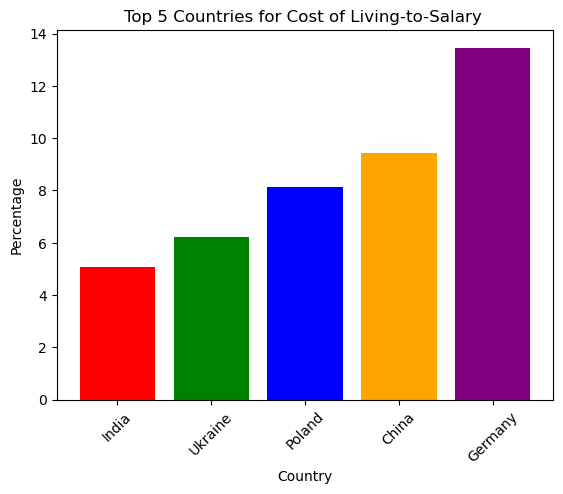

In [193]:
### Now we can graph it simply for the cost of living.
### The smallest the percentage is the better place to live 
### based on the salary amount and the spending

import matplotlib.pyplot as plt

### first we need to write the column names on plt.bar as values.
colors = ['red', 'green', 'blue', 'orange', 'purple']

plt.bar(cost_perc_sorted['Country'][:5],cost_perc_sorted['cost_perc'][:5], color = colors)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Top 5 Countries for Cost of Living-to-Salary ')
plt.show()


=======================================================================================================================================

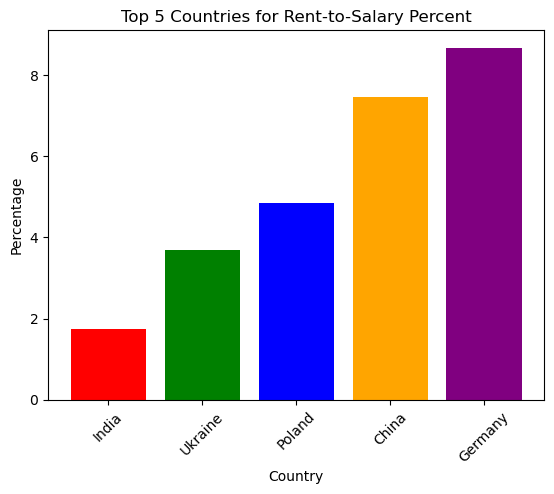

In [204]:
### Now we can graph it simply for the rent.
### The smallest the percentage is the better place to live 
### based on the salary amount and the spending

### First we need to write the column names on plt.bar as values.
colors = ['red', 'green', 'blue', 'orange', 'purple']

plt.bar(rent_perc_sorted['Country'][:5],rent_perc_sorted['rent_perc'][:5], color = colors)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Top 5 Countries for Rent-to-Salary Percent')
plt.show()


=======================================================================================================================================

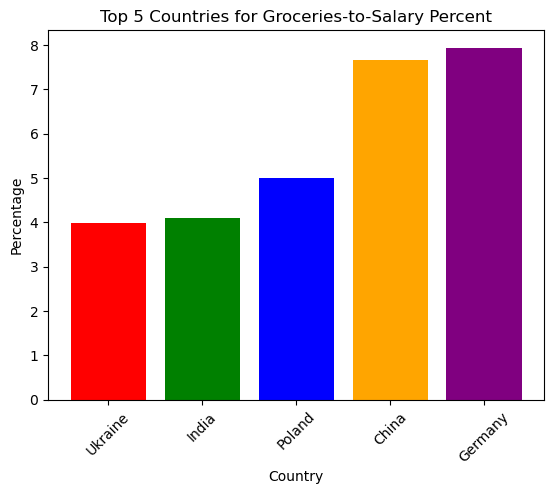

In [207]:
colors = ['red', 'green', 'blue', 'orange', 'purple']

plt.bar(groceries_perc_sorted['Country'][:5],groceries_perc_sorted['groceries_perc'][:5], color = colors)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Top 5 Countries for Groceries-to-Salary Percent')
plt.show()

=======================================================================================================================================

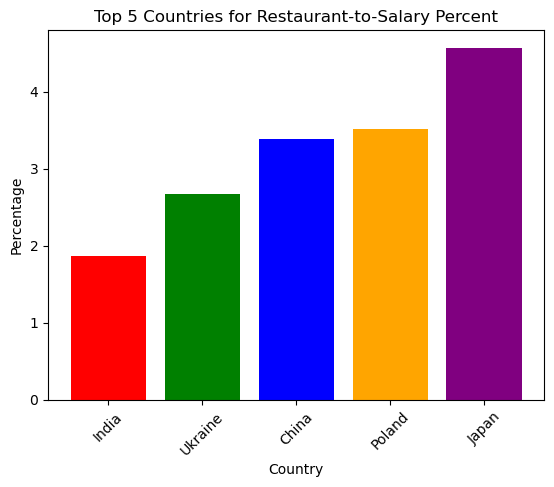

In [210]:
colors = ['red', 'green', 'blue', 'orange', 'purple']

plt.bar(restaurent_perc_sorted['Country'][:5],restaurent_perc_sorted['restaurant_perc'][:5], color = colors)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Top 5 Countries for Restaurant-to-Salary Percent')
plt.show()

=======================================================================================================================================

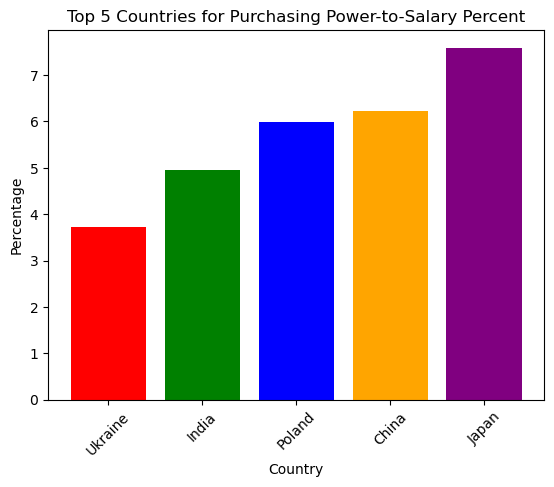

In [213]:
colors = ['red', 'green', 'blue', 'orange', 'purple']

plt.bar(purchase_power_perc_sorted['Country'][:5],purchase_power_perc_sorted['purchase_power_perc'][:5], color = colors)
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Top 5 Countries for Purchasing Power-to-Salary Percent')
plt.show()